In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

log1=pd.read_csv('../vol1_ext_alcore/log_real.csv')
log2=pd.read_csv('../vol2_ext_alcore/log_real.csv')
log3=pd.read_csv('../vol12/log_real.csv')


def gen_grad_acc(df):
    
    df3=df
    import transforms3d as tf3d
    
    acc_ned_grad=np.zeros((len(df3),3))

    acc_ned_grad[:,0]=np.diff(df3['speed[0]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,0]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,0]])

    acc_ned_grad[:,1]=np.diff(df3['speed[1]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,1]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,1]])


    acc_ned_grad[:,2]=np.diff(df3['speed[2]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,2]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,2]])

    acc_body_grad=np.zeros((len(df3),3))
    speed_body=np.zeros((len(df3),3))
    gamma=np.zeros((len(df3),3))
    
    for i in df3.index:
        q0,q1,q2,q3=df3["q[0]"][i],df3["q[1]"][i],df3["q[2]"][i],df3["q[3]"][i]
    #     print(i,q0,q1,q2,q3)
        R=tf3d.quaternions.quat2mat(np.array([q0,q1,q2,q3])).T
        
        acc_body_grad[i]=R.T@acc_ned_grad[i]
        acc_body_grad[i]=acc_body_grad[i].flatten()
        speed_body[i]=R.T@np.array([df3['speed[0]'][i],df3['speed[1]'][i],df3['speed[2]'][i]])
        speed_body[i]=speed_body[i].flatten()
        gamma[i]=R.T@np.array([0,0,9.81])
        gamma[i]=gamma[i].flatten()
        
    df3['acc_ned_grad[0]'],df3['acc_ned_grad[1]'],df3['acc_ned_grad[2]']=acc_ned_grad.T
    df3['acc_body_grad[0]'],df3['acc_body_grad[1]'],df3['acc_body_grad[2]']=acc_body_grad.T
    df3['speed_body[0]'],df3['speed_body[1]'],df3['speed_body[2]']=speed_body.T
    df3['gamma[0]'],df3['gamma[1]'],df3['gamma[2]']=gamma.T
    
    return df3


log1_new=gen_grad_acc(log1)
log2_new=gen_grad_acc(log2)
# log3_new=gen_grad_acc(log3)

log1_new.to_csv('../vol1_ext_alcore/log_real_processed.csv')
log2_new.to_csv('../vol2_ext_alcore/log_real_processed.csv')
# log2_new.to_csv('../vol12/log_real_processed.csv')

In [3]:
log1_new

,t,acc[0],acc[1],acc[2],speed[0],speed[1],speed[2],pos[0],pos[1],pos[2],...,acc_ned_grad[2],acc_body_grad[0],acc_body_grad[1],acc_body_grad[2],speed_body[0],speed_body[1],speed_body[2],gamma[0],gamma[1],gamma[2]
0,0.000000,0.006025,-0.017269,0.016462,0.008110,-0.015981,0.002493,0.123243,0.203548,0.226099,...,0.000000,0.000000,0.000000,0.000000,0.014495,-0.010359,0.003156,-0.026829,0.584947,9.792508
1,0.004014,0.006025,-0.017269,0.016462,0.008110,-0.015981,0.002493,0.123243,0.203548,0.226099,...,0.000000,0.000000,0.000000,0.000000,0.014495,-0.010359,0.003156,-0.026828,0.584948,9.792508
2,0.007291,0.006025,-0.017269,0.016462,0.008110,-0.015981,0.002493,0.123243,0.203548,0.226099,...,0.000000,0.000000,0.000000,0.000000,0.014495,-0.010359,0.003156,-0.026816,0.584970,9.792507
3,0.015249,0.006025,-0.017269,0.016462,0.008110,-0.015981,0.002493,0.123243,0.203548,0.226099,...,0.000000,0.000000,0.000000,0.000000,0.014494,-0.010360,0.003156,-0.026776,0.585080,9.792500
4,0.019995,0.006025,-0.017269,0.016462,0.008110,-0.015981,0.002493,0.123243,0.203548,0.226099,...,0.000000,0.000000,0.000000,0.000000,0.014494,-0.010360,0.003156,-0.026794,0.585074,9.792501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65514,276.720830,0.143907,-0.085768,-0.034023,0.500131,-0.585261,0.031190,11.597409,-6.214849,1.470999,...,0.000000,0.000000,0.000000,0.000000,0.569920,0.518428,-0.007669,0.508601,-0.113849,-9.796145
65515,276.724792,0.143907,-0.085768,-0.034023,0.500131,-0.585261,0.031190,11.597409,-6.214849,1.470999,...,0.000000,0.000000,0.000000,0.000000,0.569919,0.518429,-0.007673,0.508517,-0.113825,-9.796150
65516,276.728836,0.143907,-0.085768,-0.034023,0.500131,-0.585261,0.031190,11.597409,-6.214849,1.470999,...,0.000000,0.000000,0.000000,0.000000,0.569921,0.518426,-0.007679,0.508399,-0.113806,-9.796156
65517,276.732792,0.143907,-0.085768,-0.034023,0.500131,-0.585261,0.031190,11.597409,-6.214849,1.470999,...,0.000000,0.000000,0.000000,0.000000,0.569916,0.518431,-0.007686,0.508299,-0.113820,-9.796161


In [4]:
log2_new

,Unnamed: 0,level_0,t,acc[0],acc[1],acc[2],speed[0],speed[1],speed[2],pos[0],...,acc_body_grad[1],acc_body_grad[2],speed_body[0],speed_body[1],speed_body[2],Unnamed: 0.1,index,gamma[0],gamma[1],gamma[2]
0,0,9427,0.000000,-2.141690,1.341866,-2.292299,0.817011,0.704881,-0.393912,1.635983,...,0.335921,-0.568027,1.020368,-0.261555,-0.458225,NaN,NaN,0.741814,0.559006,9.765927
1,1,9428,0.003949,-2.228277,1.362252,-2.521993,0.812490,0.701236,-0.396508,1.639233,...,0.334874,-0.565764,1.013666,-0.261058,-0.461976,NaN,NaN,0.760898,0.576792,9.763424
2,2,9429,0.007974,-2.316529,1.383030,-2.756107,0.807882,0.697521,-0.399155,1.642544,...,0.334569,-0.561396,1.006205,-0.260384,-0.467211,NaN,NaN,0.792291,0.586762,9.760332
3,3,9430,0.011949,-2.403686,1.403551,-2.987313,0.803331,0.693852,-0.401768,1.645815,...,0.332393,-0.558970,0.999300,-0.260318,-0.470981,NaN,NaN,0.815329,0.618418,9.756480
4,4,9431,0.015958,-2.491588,1.424246,-3.220497,0.798742,0.690151,-0.404404,1.649114,...,0.331786,-0.556653,0.992482,-0.259704,-0.474735,NaN,NaN,0.833634,0.631285,9.754108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81393,81393,33113,344.984165,0.282363,-1.059718,-0.200734,0.458131,-0.084750,-0.016704,-3.661964,...,-1.079090,-0.153639,0.187793,-0.425370,0.033758,33113.0,42540.0,-0.801370,0.804743,9.744039
81394,81394,33114,344.987425,0.372776,-1.194040,-0.228019,0.460716,-0.087112,-0.017454,-3.660443,...,-1.079179,-0.152962,0.187321,-0.428879,0.033553,33114.0,42541.0,-0.802392,0.811038,9.743433
81395,81395,33115,344.992147,0.503737,-1.388602,-0.267540,0.464459,-0.090533,-0.018541,-3.658240,...,-1.079129,-0.153750,0.186772,-0.433939,0.032787,33115.0,42542.0,-0.813695,0.805071,9.742990
81396,81396,33116,344.996146,0.614646,-1.553373,-0.301010,0.467629,-0.093430,-0.019461,-3.656374,...,-1.079471,-0.151375,0.186246,-0.438176,0.033155,33116.0,42543.0,-0.814457,0.826577,9.741126


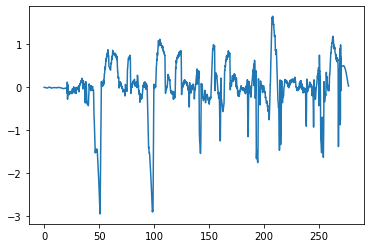

In [5]:
plt.plot(log1.t,log1['speed[2]'])

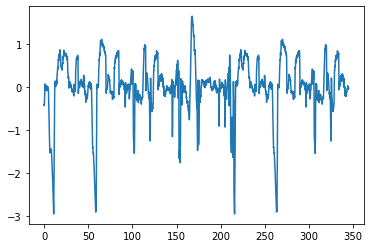

In [6]:
plt.plot(log2.t,log2['speed[2]'])

In [7]:
log1_r=log1[log1["t"]>40]
log1_r=log1_r[log1_r["t"]<255]

log2_r=log2[log2["t"]>10]
log2_r=log2_r[log2_r['t']<140]


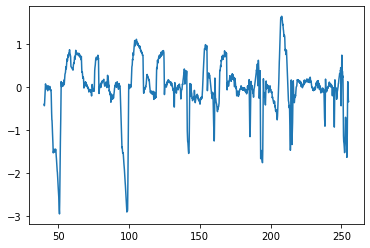

In [8]:
plt.plot(log1_r.t,log1_r['speed[2]'])

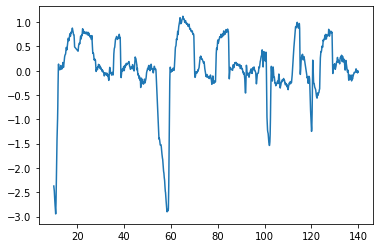

In [9]:
plt.plot(log2_r.t,log2_r['speed[2]'])

In [10]:
log1_r["t"]=log1_r["t"]-log1_r['t'].min()
log2_r["t"]=log2_r["t"]-log2_r['t'].min()+5e-3+log1_r["t"].max()


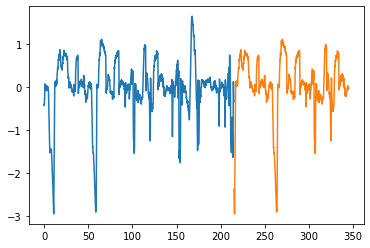

In [11]:
plt.plot(log1_r.t,log1_r['speed[2]'])
plt.plot(log2_r.t,log2_r['speed[2]'])

In [12]:
df3=pd.concat([log1_r,log2_r])

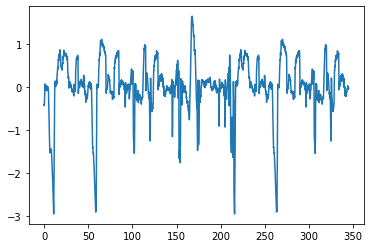

In [13]:
plt.plot(df3.t,df3['speed[2]'])


In [14]:
df3=df3.reset_index()


ValueError: cannot insert level_0, already exists

In [ ]:
import transforms3d as tf3d

In [ ]:
acc_ned_grad=np.zeros((len(df3),3))

acc_ned_grad[:,0]=np.diff(df3['speed[0]'],append=0)/np.diff(df3["t"],append=4e-3)

acc_ned_grad[:,0]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,0]])

acc_ned_grad[:,1]=np.diff(df3['speed[1]'],append=0)/np.diff(df3["t"],append=4e-3)

acc_ned_grad[:,1]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,1]])


acc_ned_grad[:,2]=np.diff(df3['speed[2]'],append=0)/np.diff(df3["t"],append=4e-3)

acc_ned_grad[:,2]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,2]])


In [ ]:
acc_body_grad=np.zeros((len(df3),3))

for i in df3.index:
    q0,q1,q2,q3=df3["q[0]"][i],df3["q[1]"][i],df3["q[2]"][i],df3["q[3]"][i]
#     print(i,q0,q1,q2,q3)
    R=tf3d.quaternions.quat2mat(np.array([q0,q1,q2,q3]))
    acc_body_grad[i]=R.T@(acc_ned_grad[i].reshape((3,1))).flatten()
    

In [ ]:

df3['acc_ned_grad[0]'],df3['acc_ned_grad[1]'],df3['acc_ned_grad[2]']=acc_ned_grad.T
df3['acc_body_grad[0]'],df3['acc_body_grad[1]'],df3['acc_body_grad[2]']=acc_body_grad.T

In [ ]:
df3.to_csv('./log_real.csv')

In [ ]:
[(plt.figure(),plt.plot(df3["t"],df3['acc[%i]'%(i)]),plt.plot(df3["t"],df3['acc_ned_grad[%i]'%(i)])) for i in range(3)]
plt.gca().set_ylim(-15,15)

In [ ]:
df3['q[0]'].plot()
df3['q[1]'].plot()
df3['q[2]'].plot()
df3['q[3]'].plot()